In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
sys.path.append('../')
import os
import curvedsky as cs

In [2]:
%load_ext autoreload
%autoreload 2
from quest import Reconstruction
from plotstat import recStat

In [3]:
rec_nofg = Reconstruction.from_ini('LB_FG0.ini')
rec_fg1 = Reconstruction.from_ini('LB_FG1.ini')
rec_fg2 = Reconstruction.from_ini('LB_FG2.ini')


DATABASE: loaded
SIMUALATION object with out FG: Loaded
FILTERING object with out FG: Loaded
QUEST object with out FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded
DATABASE: loaded
SIMUALATION object with  FG: Loaded
FILTERING object with  FG: Loaded
QUEST object with  FG: Loaded


In [4]:
mystat = recStat(rec_nofg=rec_nofg,rec_fg1=rec_fg1,rec_fg2=rec_fg2)

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../plotstat.py:48: RuntimeWarning: invalid value encountered in true_divide
  axs[0].semilogy(rec_nofg.Lfac*(rec_nofg.MCN0()/rec_nofg.response_mean()**2 ),label='NOFG-MCN0',c='b')
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../plotstat.py:49: RuntimeWarning: invalid value encountered in true_divide
  axs[0].semilogy(rec_fg1.Lfac*(rec_fg1.MCN0()/rec_fg1.response_mean()**2 ),label=f'{self.fg1}-MCN0',c='r',)
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../plotstat.py:50: RuntimeWarning: invalid value encountered in true_divide
  axs[0].semilogy(rec_fg2.Lfac*(rec_fg2.MCN0()/rec_fg2.response_mean()**2 ),label=f'{self.fg2}-MCN0',)
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../plotstat.py:51: RuntimeWarning: invalid value encountered in true_divide
  axs[0].semilogy(rec_fg1.Lfac*(rec_nofg.MCN0()/rec_nofg.response_mean()**2 )/100,label='NOFG-MC Error')
/global/u2/l/lonappan/workspace/LBlens/Notebooks/../plotstat.py:52: RuntimeWarn

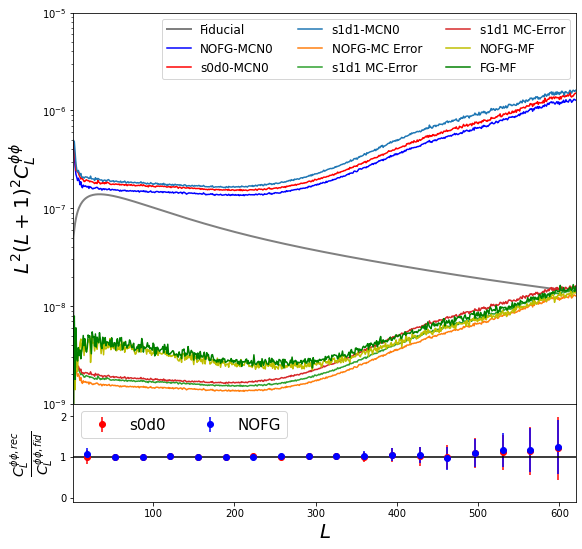

In [19]:
mystat.plot_fg_impact()

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:129: RuntimeWarning: invalid value encountered in true_divide
  nhl = self.MCN0()/self.response_mean()**2


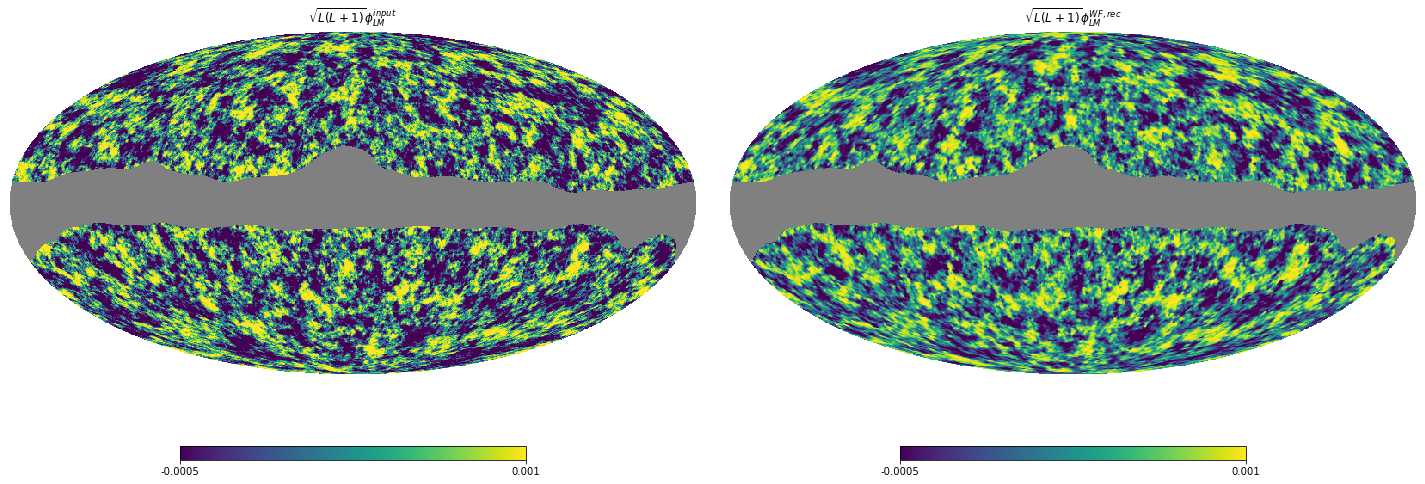

In [6]:
mystat.plot_map_dif()

/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:608: RuntimeWarning: invalid value encountered in true_divide
  plt.loglog(self.Lfac*(self.MCN0()/self.response_mean()**2 ),label='MCN0',c='r')


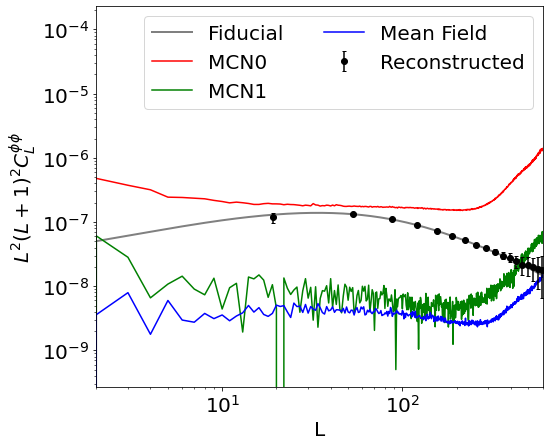

In [7]:
rec_fg1.plot_qcl_stat(rdn0=True)

In [8]:
mystat.SNR_impact()

SNR NOFG: 45.12
SNR FG1: 40.88 decreased by 9.39 %
SNR FG2: 40.03 decreased by 11.28 %


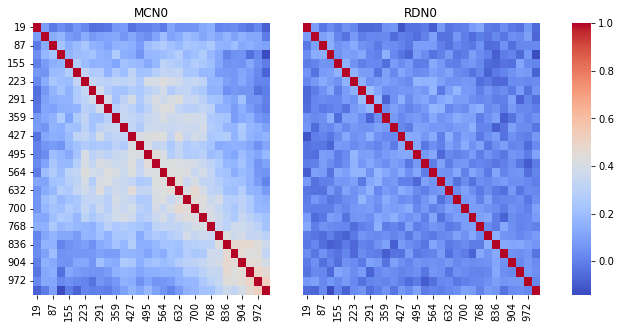

In [18]:
mystat.plot_bin_corr_comp(which=2)